In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(15,10)

In [2]:
train_data=pd.read_csv('twitter_x_y_train.csv')
test_data=pd.read_csv('twitter_x_test.csv')

# DATA CLEANING




In [3]:
keys,values=np.unique(train_data.airline_sentiment,return_counts=True)

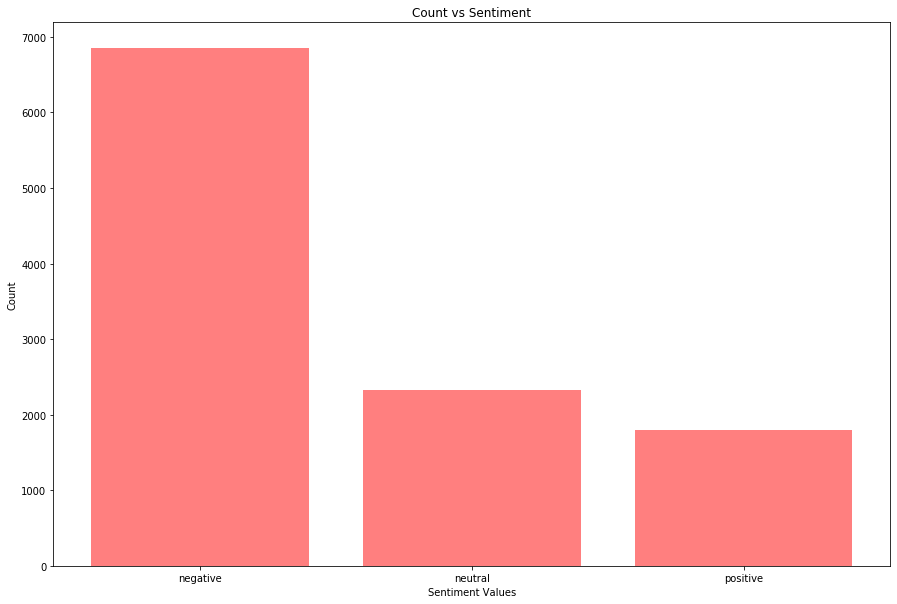

In [4]:
matplotlib.rcParams['figure.figsize']=(15,10)
plt.bar(keys,values,align='center', alpha=0.5,color='r')
plt.xlabel('Sentiment Values')
plt.ylabel('Count')
plt.title('Count vs Sentiment')
plt.show()

In [5]:
train_data.shape

(10980, 12)

In [6]:
test_data.shape

(3660, 11)

In [7]:
train_data.head()

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


## tweet_id is a unique id corresponding to each tweet so it is not important

In [8]:
train_data.drop('tweet_id',axis=1,inplace=True)
test_data.drop('tweet_id',axis=1,inplace=True)

In [9]:
train_data.head()

,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,positive,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,negative,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,negative,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [10]:
test_data.head()

,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,American,NaN,zsalim03,NaN,0,@AmericanAir In car gng to DFW. Pulled over 1h...,NaN,2015-02-22 18:15:50 -0800,Texas,Central Time (US & Canada)
1,American,NaN,sa_craig,NaN,0,"@AmericanAir after all, the plane didn’t land ...",NaN,2015-02-22 13:22:57 -0800,"College Station, TX",Central Time (US & Canada)
2,Southwest,NaN,DanaChristos,NaN,1,@SouthwestAir can't believe how many paying cu...,NaN,2015-02-17 18:52:31 -0800,CT,Eastern Time (US & Canada)
3,US Airways,NaN,rossj987,NaN,0,@USAirways I can legitimately say that I would...,NaN,2015-02-22 23:16:24 -0800,"Washington, D.C.",Eastern Time (US & Canada)
4,American,NaN,tranpham18,NaN,0,@AmericanAir still no response from AA. great ...,NaN,2015-02-23 08:44:51 -0800,New York City,Eastern Time (US & Canada)


In [11]:
train_data.isnull().sum()

airline_sentiment             0
airline                       0
airline_sentiment_gold    10949
name                          0
negativereason_gold       10956
retweet_count                 0
text                          0
tweet_coord               10204
tweet_created                 0
tweet_location             3550
user_timezone              3577
dtype: int64

## As we can see that airline_sentiment_gold,negativereason_gold and  tweet_coord contains so many nan values that they are not useful


In [12]:
train_data.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)
test_data.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],axis=1,inplace=True)

In [13]:
train_data.head()

,airline_sentiment,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,negative,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ...",2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,positive,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,positive,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,negative,Southwest,amccarthy19,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,negative,United,J_Okayy,0,@united so our flight into ORD was delayed bec...,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)


In [14]:
train_data.isnull().sum()

airline_sentiment       0
airline                 0
name                    0
retweet_count           0
text                    0
tweet_created           0
tweet_location       3550
user_timezone        3577
dtype: int64

In [15]:
test_data.isnull().sum()

airline              0
name                 0
retweet_count        0
text                 0
tweet_created        0
tweet_location    1183
user_timezone     1243
dtype: int64

In [16]:
positive_sentiment_df=train_data[train_data.airline_sentiment=='positive']
negative_sentiment_df=train_data[train_data.airline_sentiment=='negative']
neutral_sentiment_df=train_data[train_data.airline_sentiment=='neutral']

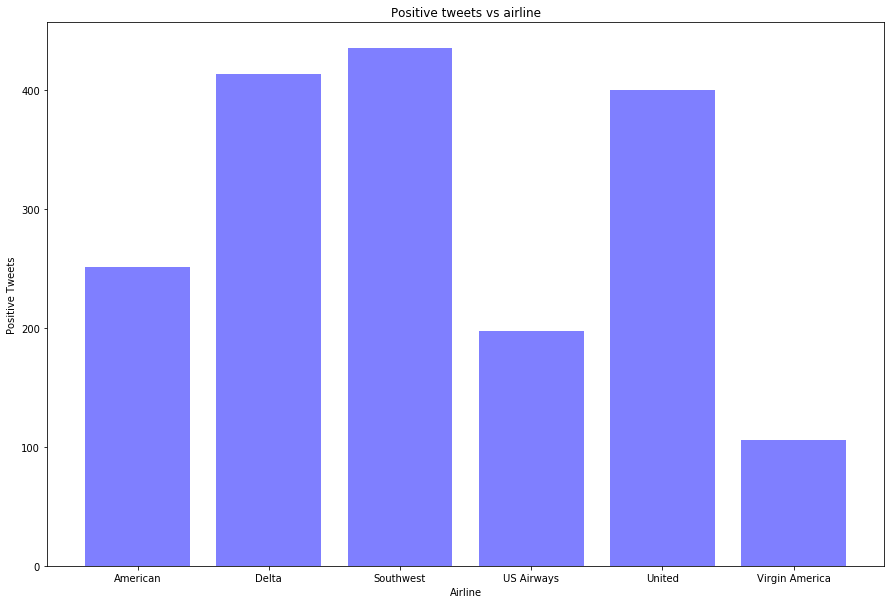

In [17]:
(keys,values)=np.unique(positive_sentiment_df.airline,return_counts=True)
plt.bar(keys,values,align='center', alpha=0.5,color='b')
plt.xlabel('Airline')
plt.ylabel('Positive Tweets')
plt.title('Positive tweets vs airline')
plt.show()

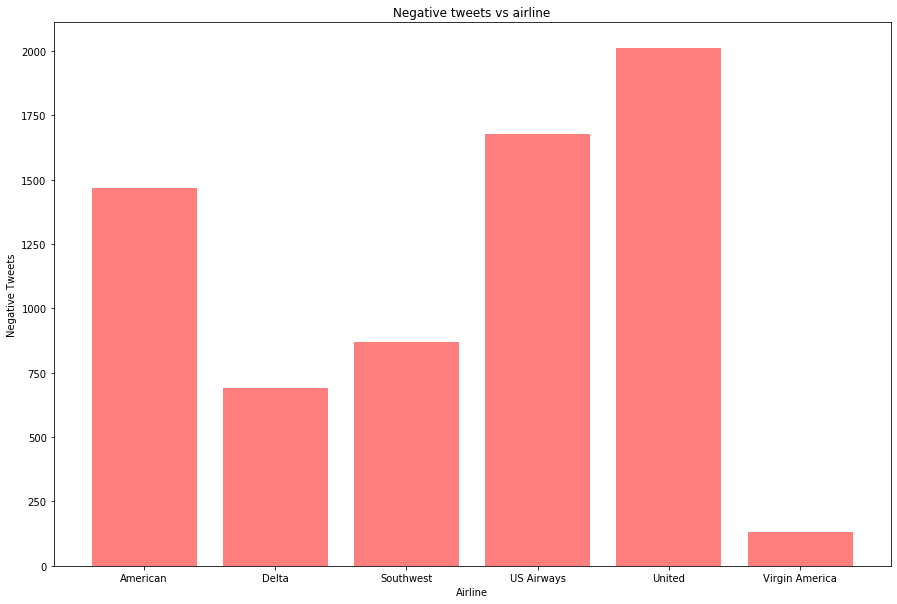

In [18]:
(keys,values)=np.unique(negative_sentiment_df.airline,return_counts=True)
plt.bar(keys,values,align='center', alpha=0.5,color='r')
plt.xlabel('Airline')
plt.ylabel('Negative Tweets')
plt.title('Negative tweets vs airline')
plt.show()

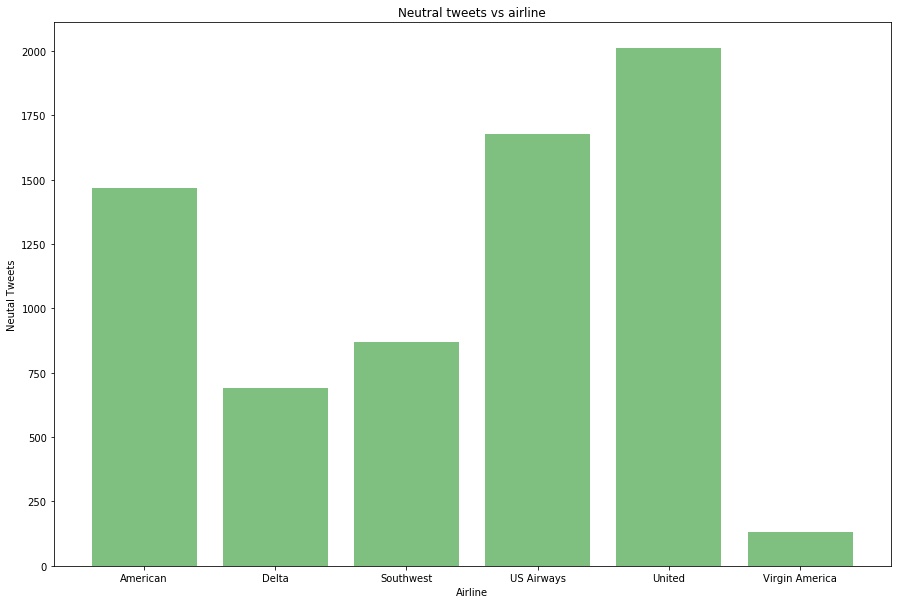

In [19]:
(keys,values)=np.unique(negative_sentiment_df.airline,return_counts=True)
plt.bar(keys,values,align='center', alpha=0.5,color='g')
plt.xlabel('Airline')
plt.ylabel('Neutal Tweets')
plt.title('Neutral tweets vs airline')
plt.show()

## So we see that sentiment differs for different airlines as well thus it's an important feature 

## One hot encoding the airline names so that they can be used as features


In [20]:
airline_train_dummies=pd.get_dummies(train_data.airline)

In [21]:
train_data2=pd.concat([train_data,airline_train_dummies],axis=1)

In [22]:
airline_test_dummies=pd.get_dummies(test_data.airline)

In [23]:
test_data2=pd.concat([test_data,airline_test_dummies],axis=1)

In [24]:
train_data2.head()

,airline_sentiment,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,American,Delta,Southwest,US Airways,United,Virgin America
0,negative,Southwest,ColeyGirouard,0,"@SouthwestAir I am scheduled for the morning, ...",2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada),0,0,1,0,0,0
1,positive,Southwest,WalterFaddoul,0,@SouthwestAir seeing your workers time in and ...,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada),0,0,1,0,0,0
2,positive,United,LocalKyle,0,@united Flew ORD to Miami and back and had gr...,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada),0,0,0,0,1,0
3,negative,Southwest,amccarthy19,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada),0,0,1,0,0,0
4,negative,United,J_Okayy,0,@united so our flight into ORD was delayed bec...,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada),0,0,0,0,1,0


In [25]:
train_data2.name.value_counts()

JetBlueNews        43
otisday            25
_mhertz            22
kbosspotter        18
weezerandburnie    18
                   ..
billgunger          1
mnorouzi            1
JDesca01            1
CapeMcMoose         1
DawnElisabeth16     1
Name: name, Length: 6438, dtype: int64

## Taking only few of the most occuring names in the tweets as there are too many of them.


In [26]:
min_count=15 # a threshold value if a name occurs less than it in the tweets then we consider it into name_other label
names=(train_data2.name.value_counts() < min_count)

In [27]:
train_data2['name']=train_data2['name'].apply(lambda name:'name_other' if names.loc[name]==True else name)

In [28]:
train_data2.name.value_counts()

name_other         10740
JetBlueNews           43
otisday               25
_mhertz               22
weezerandburnie       18
kbosspotter           18
MeeestarCoke          17
flemmingerin          17
ThatJasonEaton        17
thomashoward88        16
GREATNESSEOA          16
throthra              16
Aero0729              15
Name: name, dtype: int64

In [29]:
train_data2.name.unique()

array(['name_other', 'JetBlueNews', '_mhertz', 'thomashoward88',
       'GREATNESSEOA', 'ThatJasonEaton', 'otisday', 'MeeestarCoke',
       'Aero0729', 'flemmingerin', 'kbosspotter', 'weezerandburnie',
       'throthra'], dtype=object)

In [30]:
distinct_names=train_data2.name.value_counts()

In [31]:
test_data2.name.unique()

array(['zsalim03', 'sa_craig', 'DanaChristos', ..., 'Anthony_Scerri',
       'GoldensPleasure', 'suntoshi'], dtype=object)

In [32]:
test_data2['name']=test_data['name'].apply(lambda name:'name_other' if name not in distinct_names else name)

In [33]:
len(test_data2.name.unique())

13

In [34]:
positive_names,positive_counts=np.unique(train_data2[train_data2.airline_sentiment=='positive'][train_data2.name!='name_other'].name,return_counts=True)
negative_names,negative_counts=np.unique(train_data2[train_data2.airline_sentiment=='negative'][train_data2.name!='name_other'].name,return_counts=True)
neutral_names,neutral_counts=np.unique(train_data2[train_data2.airline_sentiment=='neutral'][train_data2.name!='name_other'].name,return_counts=True)

/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/ankit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


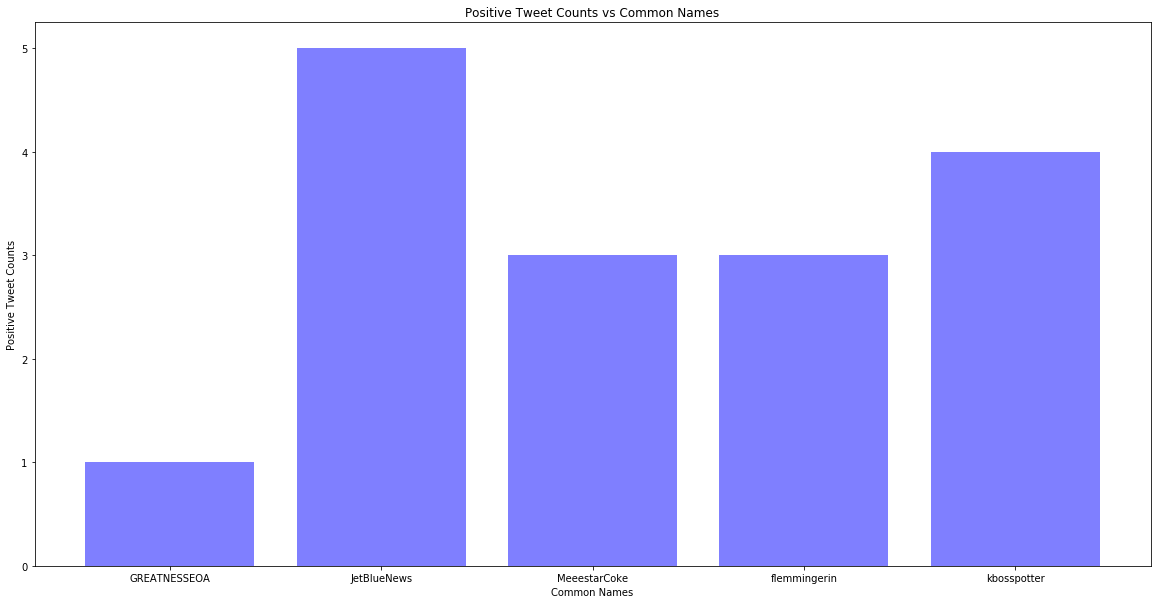

In [35]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.bar(positive_names,positive_counts,align='center', alpha=0.5,color='blue')
plt.xlabel('Common Names')
plt.ylabel('Positive Tweet Counts')
plt.title('Positive Tweet Counts vs Common Names')
plt.show()

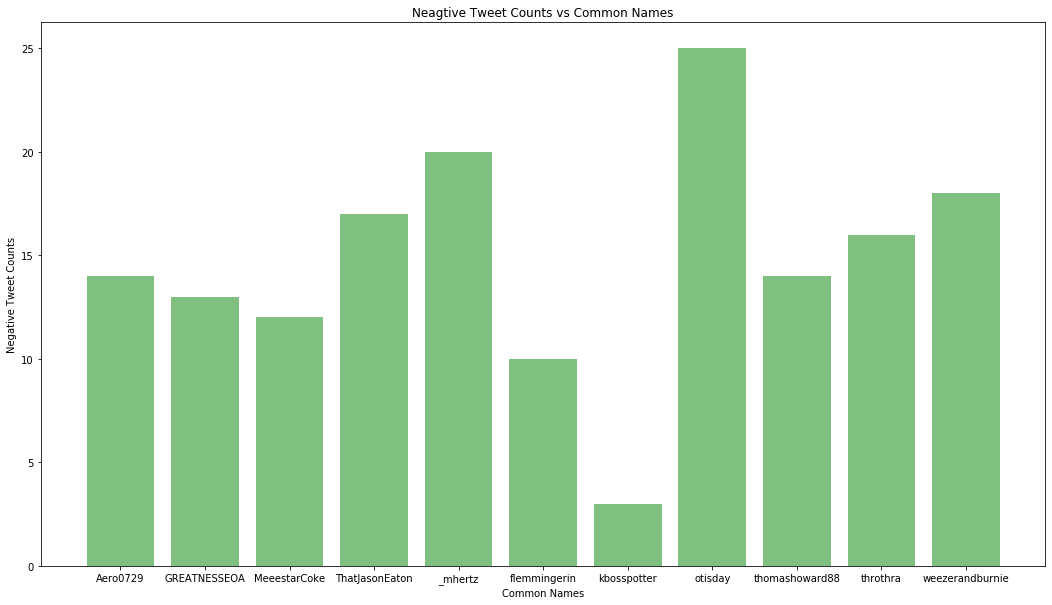

In [267]:
matplotlib.rcParams['figure.figsize']=(18,10)
plt.bar(negative_names,negative_counts,align='center', alpha=0.5,color='green')
plt.xlabel('Common Names')
plt.ylabel('Negative Tweet Counts')
plt.title('Neagtive Tweet Counts vs Common Names')
plt.show()

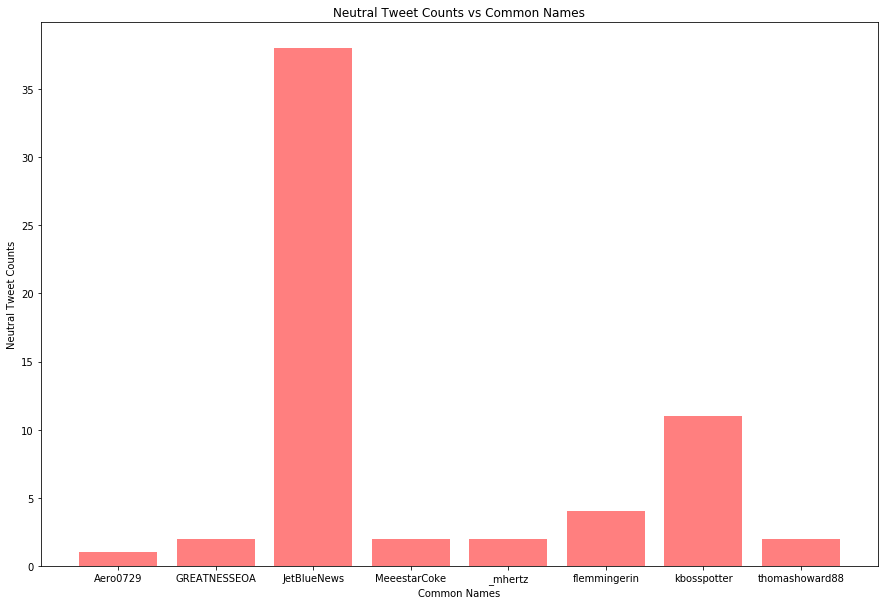

In [265]:
matplotlib.rcParams['figure.figsize']=(15,10)
plt.bar(neutral_names,neutral_counts,align='center', alpha=0.5,color='red')
plt.xlabel('Common Names')
plt.ylabel('Neutral Tweet Counts')
plt.title('Neutral Tweet Counts vs Common Names')
plt.show()

## Encoding the names as one hot encoding


In [38]:
name_train_dummies=pd.get_dummies(train_data2.name)

In [39]:
train_data3=pd.concat([train_data2,name_train_dummies],axis=1)

In [40]:
name_test_dummies=pd.get_dummies(test_data2.name)

In [41]:
test_data3=pd.concat([test_data2,name_test_dummies],axis=1)

In [42]:
train_data3.shape,test_data3.shape

((10980, 27), (3660, 26))

In [43]:
train_data3.isnull().sum()

airline_sentiment       0
airline                 0
name                    0
retweet_count           0
text                    0
tweet_created           0
tweet_location       3550
user_timezone        3577
American                0
Delta                   0
Southwest               0
US Airways              0
United                  0
Virgin America          0
Aero0729                0
GREATNESSEOA            0
JetBlueNews             0
MeeestarCoke            0
ThatJasonEaton          0
_mhertz                 0
flemmingerin            0
kbosspotter             0
name_other              0
otisday                 0
thomashoward88          0
throthra                0
weezerandburnie         0
dtype: int64

In [44]:
test_data3.isnull().sum()

airline               0
name                  0
retweet_count         0
text                  0
tweet_created         0
tweet_location     1183
user_timezone      1243
American              0
Delta                 0
Southwest             0
US Airways            0
United                0
Virgin America        0
Aero0729              0
GREATNESSEOA          0
JetBlueNews           0
MeeestarCoke          0
ThatJasonEaton        0
_mhertz               0
flemmingerin          0
kbosspotter           0
name_other            0
otisday               0
thomashoward88        0
throthra              0
weezerandburnie       0
dtype: int64

## Since we don't know what's an apt fill up for tweet_location and user_timezone we'll drop it


In [45]:
train_data3.drop(['tweet_location','user_timezone'],axis=1,inplace=True)

In [46]:
test_data3.drop(['tweet_location','user_timezone'],axis=1,inplace=True)

In [47]:
train_data3.shape,test_data3.shape

((10980, 25), (3660, 24))

In [48]:
len(train_data3.tweet_created.unique())

10758

## tweet_created is the time at which tweet is created so a lot of unique values hence dropping it


In [49]:
train_data3.drop('tweet_created',axis=1,inplace=True )

In [50]:
test_data3.drop('tweet_created',axis=1,inplace=True)

In [51]:
train_data3.head()

,airline_sentiment,airline,name,retweet_count,text,American,Delta,Southwest,US Airways,United,...,MeeestarCoke,ThatJasonEaton,_mhertz,flemmingerin,kbosspotter,name_other,otisday,thomashoward88,throthra,weezerandburnie
0,negative,Southwest,name_other,0,"@SouthwestAir I am scheduled for the morning, ...",0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,positive,Southwest,name_other,0,@SouthwestAir seeing your workers time in and ...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,positive,United,name_other,0,@united Flew ORD to Miami and back and had gr...,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,negative,Southwest,name_other,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,negative,United,name_other,0,@united so our flight into ORD was delayed bec...,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [52]:
text_train=train_data3['text']
text_test=test_data3['text']

## We'll clean the text seperately and then add it back in the data frame till that time we'll drop it


In [53]:
train_data3.drop('text',axis=1,inplace=True)
test_data3.drop('text',axis=1,inplace=True)

In [54]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
from nltk import pos_tag

In [56]:
from nltk.stem import WordNetLemmatizer

In [57]:
stop_words=stopwords.words('english')
stop_words.extend(string.punctuation)

In [58]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [59]:
lemmatizer=WordNetLemmatizer()

def clean_data(text):
    words=word_tokenize(text.lower())
    clean_words=[]
    for word in words:
        if (word not in stop_words) and (word.isdigit()==False):
            curr_word_pos=pos_tag([word])
            simple_pos_tag=get_wordnet_pos(curr_word_pos[0][1])
            clean_words.append(lemmatizer.lemmatize(word,simple_pos_tag))
    return clean_words

In [64]:
clean_text_train=[clean_data(current_text) for current_text in text_train]

In [65]:
clean_text_test=[clean_data(current_text) for current_text in text_test]

In [66]:
clean_text_train_strings=[" ".join(word_list) for word_list in clean_text_train]

In [67]:
clean_text_test_strings=[" ".join(word_list) for word_list in clean_text_test]

## Converting these words into features to be added in the dataframe using count vectoriser


In [251]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [226]:
count_vec=CountVectorizer(max_features=4000,ngram_range=(1,2)) # ngrams taken as both 1 and 2 so that we can use two letter words as features as well
train_text_sparse_matrix=count_vec.fit_transform(clean_text_train_strings)

In [319]:
tf_idf_vec=TfidfVectorizer(max_features=5000,ngram_range=(1,2))
train_text_sparse_matrix_tfidf=tf_idf_vec.fit_transform(clean_text_train_strings)

In [320]:
count_vec.get_feature_names()

['00',
 '000',
 '000 mile',
 '03',
 '05',
 '10',
 '10 000',
 '10 30',
 '100',
 '10pm',
 '11',
 '11 30',
 '12',
 '14',
 '15',
 '15th',
 '16',
 '17',
 '19',
 '1hr',
 '1k',
 '1st',
 '1st class',
 '1st flight',
 '1st time',
 '20',
 '2015',
 '20min',
 '21',
 '22',
 '23',
 '24',
 '24hrs',
 '24th',
 '25',
 '26',
 '27',
 '28',
 '2day',
 '2days',
 '2hrs',
 '2nd',
 '2nd time',
 '2pm',
 '2x',
 '30',
 '30 flight',
 '30am',
 '30min',
 '30pm',
 '35',
 '3am',
 '3hrs',
 '3rd',
 '3rd time',
 '40',
 '40pm',
 '45',
 '45min',
 '4pm',
 '4th',
 '50',
 '50pm',
 '55',
 '5hrs',
 '5th',
 '60',
 '6am',
 '6pm',
 '728',
 '75',
 '7am',
 '7th',
 '80',
 '800',
 '8am',
 '8pm',
 '90',
 '9pm',
 'a320',
 'aa',
 'aa amp',
 'aa flight',
 'aadvantage',
 'abc',
 'ability',
 'able',
 'able get',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accommodate',
 'accommodation',
 'accord',
 'account',
 'acct',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'ac

In [293]:
len(tf_idf_vec.get_feature_names())

3000

## Transforming training text into 2d array with features as column names and their counts per documents as feature values

In [295]:
test_text_sparse_matrix=count_vec.transform(clean_text_test_strings)

In [321]:
test_text_sparse_matrix_tfIdf=tf_idf_vec.transform(clean_text_test_strings)

In [298]:
test_text_sparse_matrix_tfIdf.shape

(3660, 3000)

In [229]:
# converting the sparse matrix into a dataframe
train_data_frame_text = pd.DataFrame.sparse.from_spmatrix(train_text_sparse_matrix,columns=count_vec.get_feature_names())

In [322]:
train_data_frame_text_tfIdf=pd.DataFrame.sparse.from_spmatrix(train_text_sparse_matrix_tfidf,columns=tf_idf_vec.get_feature_names())

In [288]:
test_data_frame_text = pd.DataFrame.sparse.from_spmatrix(test_text_sparse_matrix,columns=count_vec.get_feature_names())

In [323]:
test_data_frame_text_tfIdf=pd.DataFrame.sparse.from_spmatrix(test_text_sparse_matrix_tfIdf,columns=tf_idf_vec.get_feature_names())

In [301]:
test_data_frame_text.shape

(3660, 4000)

## Joining the data feame with text as features with the original dataframe


In [324]:
train_data4=pd.concat([train_data3,train_data_frame_text_tfIdf],axis='columns')

In [325]:
test_data4=pd.concat([test_data3,test_data_frame_text_tfIdf],axis='columns')

In [326]:
train_data4.shape,test_data4.shape

((10980, 5023), (3660, 5022))

In [327]:
# as they have been already one hot encoded
train_data4.drop(['airline','name'],axis=1,inplace=True)
test_data4.drop(['airline','name'],axis=1,inplace=True)

In [328]:
Y=train_data4['airline_sentiment']

In [329]:
train_data4.drop('airline_sentiment',axis=1,inplace=True)

In [330]:
train_data4.head()

,retweet_count,American,Delta,Southwest,US Airways,United,Virgin America,Aero0729,GREATNESSEOA,JetBlueNews,...,young,youre,yr,yr old,yup,yvr,yyz,zero,zone,zurich
0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
test_data4.head()

,retweet_count,American,Delta,Southwest,US Airways,United,Virgin America,Aero0729,GREATNESSEOA,JetBlueNews,...,young,youre,yr,yr old,yup,yvr,yyz,zero,zone,zurich
0,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TRAINING ON THE FEATURE SET

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [333]:
X=train_data4.values

In [ ]:
# splitting the training set into train and validation set
xTrain_small,xTest_small,yTrain_small,yTest_small=train_test_split(X,Y)

In [313]:
xTrain_small.shape,xTest_small.shape,yTrain_small.shape,yTest_small.shape

((8235, 3018), (2745, 3018), (8235,), (2745,))

In [314]:
xTest=test_data4.values

## Using Logistic Regression

In [315]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(xTrain_small,yTrain_small)

/home/ankit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ankit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
lr.score(xTest_small,yTest_small)

0.7810564663023679

In [282]:
yPredicted_lr_small=lr.predict(xTest_small)

In [317]:
print (classification_report(yTest_small,yPredicted_lr_small))

              precision    recall  f1-score   support

    negative       0.62      0.68      0.65      1710
     neutral       0.20      0.16      0.18       589
    positive       0.15      0.14      0.14       446

    accuracy                           0.48      2745
   macro avg       0.32      0.33      0.32      2745
weighted avg       0.45      0.48      0.47      2745



In [318]:
print (confusion_matrix(yTest_small,yPredicted_lr_small))

[[1157  302  251]
 [ 409   96   84]
 [ 293   92   61]]


In [110]:
np.savetxt("predictions.csv",yPredicted_lr,fmt="%s")

### Using SVM


In [101]:
from sklearn.svm import SVC

In [102]:
clf_svc=SVC(kernel='linear')

In [103]:
clf_svc.fit(xTrain_small,yTrain_small)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [104]:
clf_svc.score(xTest_small,yTest_small)

0.7584699453551913

### Using Multinomial Naive Bayes


In [137]:
from sklearn.naive_bayes import MultinomialNB

In [138]:
clf_mnb = MultinomialNB()

In [139]:
clf_mnb.fit(xTrain_small,yTrain_small)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [140]:
clf_mnb.score(xTest_small,yTest_small)

0.585792349726776

## Optimizing MNB Using grid search


In [88]:
from sklearn.model_selection import GridSearchCV

In [173]:
list_alpha_values=np.arange(0.1,20,0.20)

In [174]:
clf_mnb_fineTune=MultinomialNB()
grid={'alpha':list_alpha_values}
clf_mnb_best=GridSearchCV(clf_mnb_fineTune,grid)
clf_mnb_best.fit(xTrain_small,yTrain_small)

GridSearchCV(cv=None, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9, 15.1, 15.3,
       15.5, 15.7, 15.9, 16.1, 16.3, 16.5, 16.7, 16.9, 17.1, 17.3, 17.5,
       17.7, 17.9, 18.1, 18.3, 18.5, 18.7, 18.9, 19.1, 19.3, 19.5, 19.7,
       19.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             s

In [175]:
clf_mnb_best.best_estimator_

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [222]:
clf_mnb_optimized = MultinomialNB(alpha=0.1)

In [223]:
clf_mnb_optimized.fit(xTrain_small,yTrain_small)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [224]:
yPredicted=clf_mnb_optimized.predict(xTest)

In [197]:
np.savetxt("/content/drive/My Drive/predictions.csv",yPredicted,fmt="%s")

In [225]:
clf_mnb_optimized.score(xTest_small,yTest_small)

0.6859744990892532

### Using random forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
clf_rf=RandomForestClassifier()

In [171]:
clf_rf.fit(xTrain_small,yTrain_small)

/home/ankit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [172]:
clf_rf.score(xTest_small,yTest_small)

0.7096539162112933